# CO2 Exercise 2.7 (Logistic Regression Using Gradient Descent)

Author: Sebastian Pritz

## Setup

In [1]:
## adapt this directory to your needs
data_dir = 'src/'

In [2]:
import numpy as np
import random
from math import exp
from pyMLaux import plot_2d_prediction
import pandas as pd

## The Perceptron Learning Algorithm

In [3]:
def activation(X, w):
    return(1 / (1 + np.exp(-(np.matmul(X, w)))))

In [4]:
# Note: Verbose argument was introduced, to prevent spam or large documents.
def logistic_regression(X, y, w, eta, maxiter=1000, verbose=False):
    iter = 0
    list_of_indices = list(range(X.shape[0]))
    while iter < maxiter:
        iter = iter + 1
        if verbose:
            print('Epoch ', iter, ' =============================================')
        random.shuffle(list_of_indices)
        for i in list_of_indices:
            x = np.concatenate([[1], X[i, :]])
            a = activation(x.reshape((1, x.size)), w)
            delta = a - y[i]
            w = w - eta * delta * x
        if verbose:
            print(w)
            plot_2d_prediction(X, y, lambda x: activation(np.concatenate([np.ones((x.shape[0], 1)), x], axis=1), w),
                               xval=np.linspace(-0.1, 1.1, 101), yval=np.linspace(-0.1, 1.1, 101), midval=0.5)
    return(w)

### Simple 8 point dataset

In [5]:
X = np.array([[0.1, 0.5], [0.2, 0.9], [0.4, 0.7], [0.5, 0.8],
              [0.4, 0.2], [0.6, 0.3], [0.7, 0.05], [0.8, 0.5]])
y = np.array([1, 1, 1, 1, 0, 0, 0, 0])

In [6]:
w = np.array([0, 1, 1]) ## initial value of weight vector
eta11 = 0.3 ## learning rate

In [7]:
X.shape

(8, 2)

In [8]:
w_final11 = logistic_regression(X, y, w, eta11, maxiter=100)
w_final11

array([-1.23017654, -6.08818722,  8.16799134])

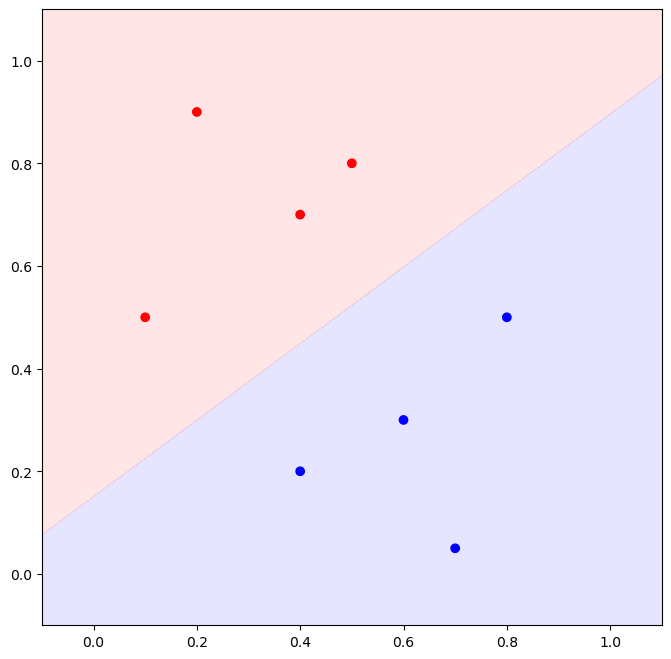

In [9]:
plot_2d_prediction(X, y, lambda x: activation(np.concatenate([np.ones((x.shape[0], 1)), x], axis=1), w_final11),
                   xval=np.linspace(-0.1, 1.1, 101), yval=np.linspace(-0.1, 1.1, 101), midval=0.5)

In [10]:
eta12 = 0.05
w_final12 = logistic_regression(X, y, w, eta12, maxiter=600)
w_final12

array([-1.22486249, -6.01310241,  8.09149293])

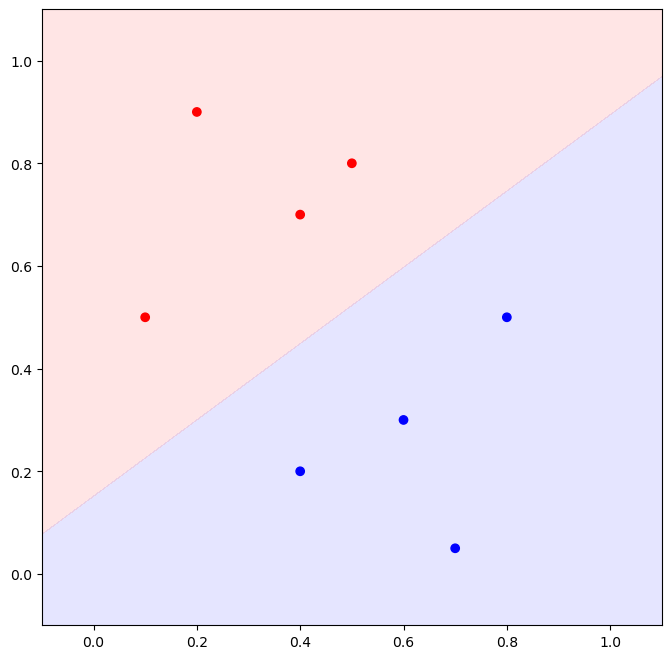

In [11]:
plot_2d_prediction(X, y, lambda x: activation(np.concatenate([np.ones((x.shape[0], 1)), x], axis=1), w_final12),
                   xval=np.linspace(-0.1, 1.1, 101), yval=np.linspace(-0.1, 1.1, 101), midval=0.5)

In [12]:
eta13 = 0.5
w_final13 = logistic_regression(X, y, w, eta13, maxiter=60)
w_final13

array([-1.21325348, -6.1355284 ,  8.24244814])

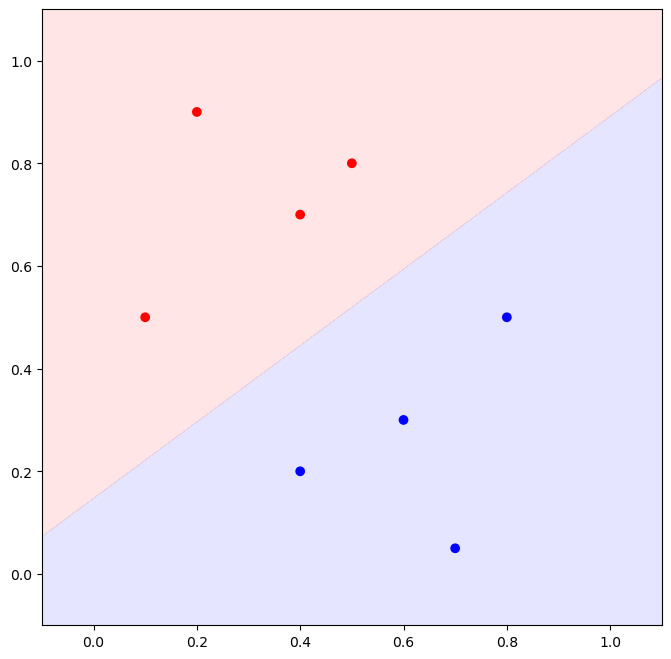

In [13]:
plot_2d_prediction(X, y, lambda x: activation(np.concatenate([np.ones((x.shape[0], 1)), x], axis=1), w_final13),
                   xval=np.linspace(-0.1, 1.1, 101), yval=np.linspace(-0.1, 1.1, 101), midval=0.5)

### Dataset2

In [14]:
data2 = pd.read_csv(data_dir+"DataSet2.csv")
data2

,X1,X2,y
0,0.324129,0.628683,0
1,0.585344,0.799904,0
2,0.250833,1.691277,0
3,-0.328271,2.444963,0
4,0.141119,1.279971,0
...,...,...,...
195,1.050391,0.342877,1
196,0.277965,0.133988,1
197,1.289139,0.205157,1
198,0.684936,-0.193807,1


In [15]:
X2 = data2[["X1", "X2"]].to_numpy()
y2 = data2[["y"]].to_numpy()

In [16]:
eta21 = 0.4
w_final21 = logistic_regression(X2, y2, w, eta21, maxiter=100)
w_final21

array([ 0.02469125,  5.51504033, -5.28461525])

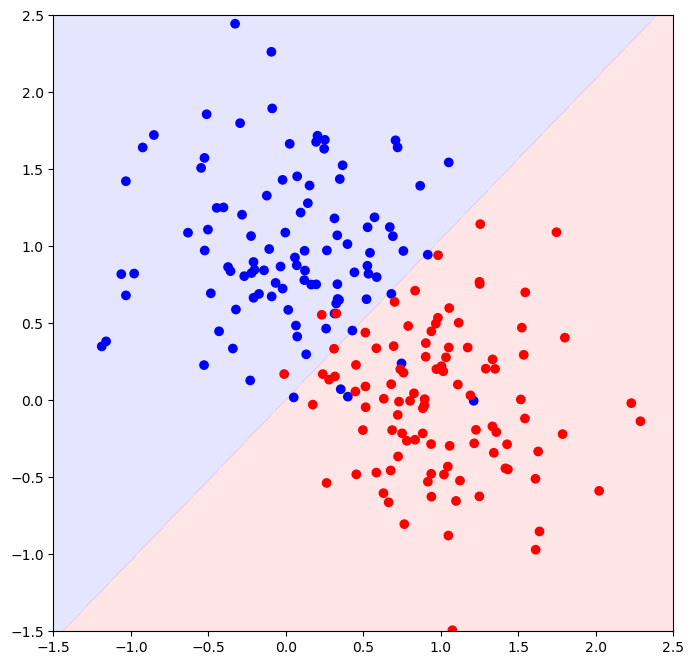

In [17]:
plot_2d_prediction(X2, y2, lambda x: activation(np.concatenate([np.ones((x.shape[0], 1)), x], axis=1), w_final21),
                   xval=np.linspace(-1.5, 2.5, 101), yval=np.linspace(-1.5, 2.5, 101), midval=0.5)

In [18]:
eta22 = 0.2
w_final22 = logistic_regression(X2, y2, w, eta22, maxiter=200)
w_final22

array([ 1.57748126e-03,  5.36627935e+00, -5.17174091e+00])

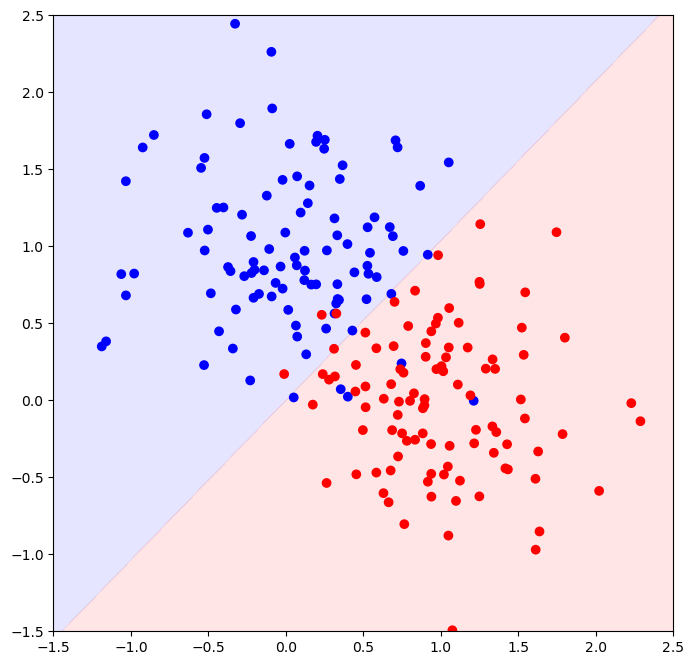

In [19]:
plot_2d_prediction(X2, y2, lambda x: activation(np.concatenate([np.ones((x.shape[0], 1)), x], axis=1), w_final22),
                   xval=np.linspace(-1.5, 2.5, 101), yval=np.linspace(-1.5, 2.5, 101), midval=0.5)

In [20]:
eta23 = 0.1
w_final23 = logistic_regression(X2, y2, w, eta23, maxiter=320)
w_final23

array([-0.18475421,  5.22059252, -5.22135597])

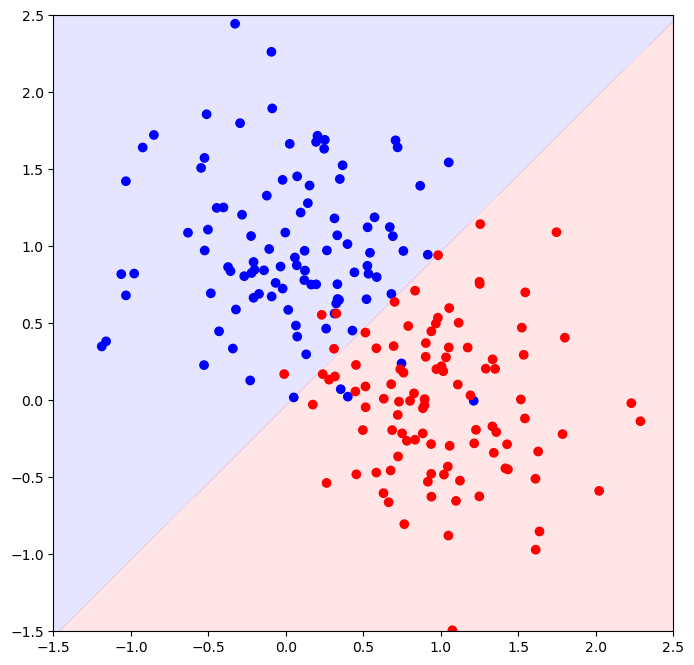

In [21]:
plot_2d_prediction(X2, y2, lambda x: activation(np.concatenate([np.ones((x.shape[0], 1)), x], axis=1), w_final23),
                   xval=np.linspace(-1.5, 2.5, 101), yval=np.linspace(-1.5, 2.5, 101), midval=0.5)

### Analyse

First off, the logical consequence of altering the learning rate is, that fewer/more iterations are needed. If the learning rate is lowered, more steps need to be taken to get to the minimum.
For the second dataset, there was a high variability in the obtained weights. Due to choosing a random index, and due to the data being more spread, if we're unlucky, we end up with worse models (lots of false classifications for the red points). To showcase this, I've executed the first configuration for dataset 2 to produce a worse result below. To make sophisticated conclusions regarding this matter, new data would be needed.

In [47]:
test_eta = 0.4
w_final_test = logistic_regression(X2, y2, w, test_eta, maxiter=100)
w_final_test

array([-0.78150778,  5.15590869, -5.47981238])

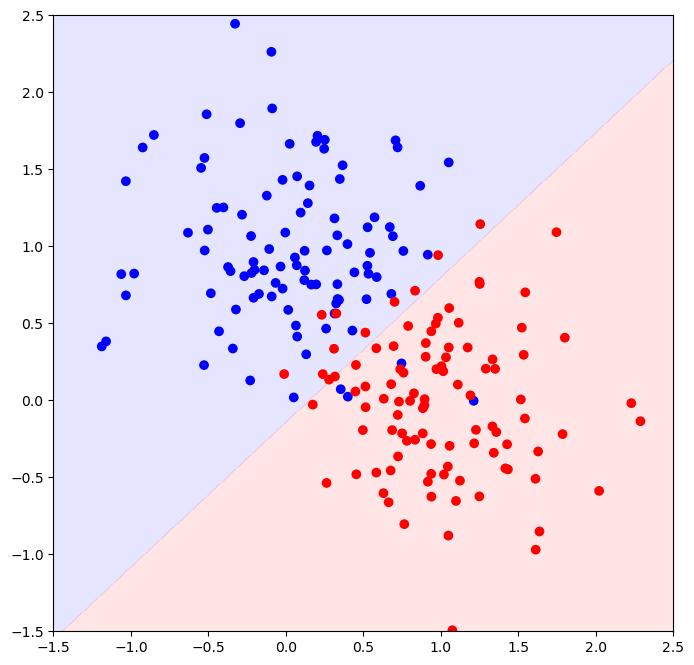

In [48]:
plot_2d_prediction(X2, y2, lambda x: activation(np.concatenate([np.ones((x.shape[0], 1)), x], axis=1), w_final_test),
                   xval=np.linspace(-1.5, 2.5, 101), yval=np.linspace(-1.5, 2.5, 101), midval=0.5)